In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.4155 - accuracy: 0.8736 - val_loss: 0.1336 - val_accuracy: 0.9612
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1718 - accuracy: 0.9502 - val_loss: 0.0841 - val_accuracy: 0.9755
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1279 - accuracy: 0.9615 - val_loss: 0.0693 - val_accuracy: 0.9801
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1054 - accuracy: 0.9682 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0895 - accuracy: 0.9737 - val_loss: 0.0571 - val_accuracy: 0.9826
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0810 - accuracy: 0.9751 - val_loss: 0.0520 - val_accuracy: 0.9843
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.0499 - val_accuracy: 0.9852

In [8]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0417 - accuracy: 0.9860
Validation accuracy: 98.60%


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0417 - accuracy: 0.9860
Test accuracy: 98.60%


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


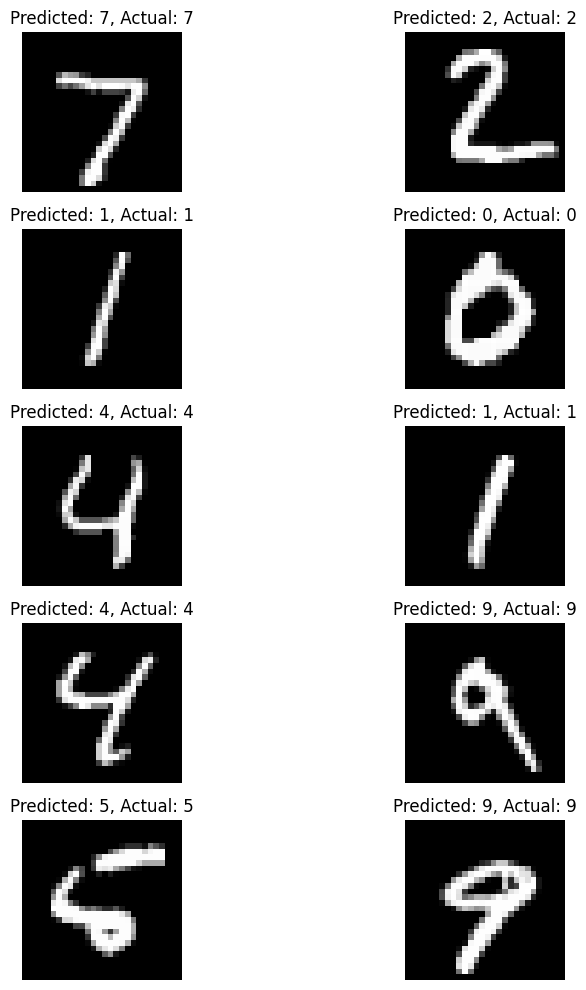

In [14]:
num_images = 10
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()